# DECISION TREE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
pd.ExcelFile('heart_disease.xlsx').sheet_names

['Description', 'Heart_disease']

In [4]:
data = pd.read_excel('heart_disease.xlsx', sheet_name=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# Handled using median (old peak)

data['oldpeak'].fillna(data['oldpeak'].median(), inplace=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Distribution of numerical features

<Figure size 1200x1000 with 0 Axes>

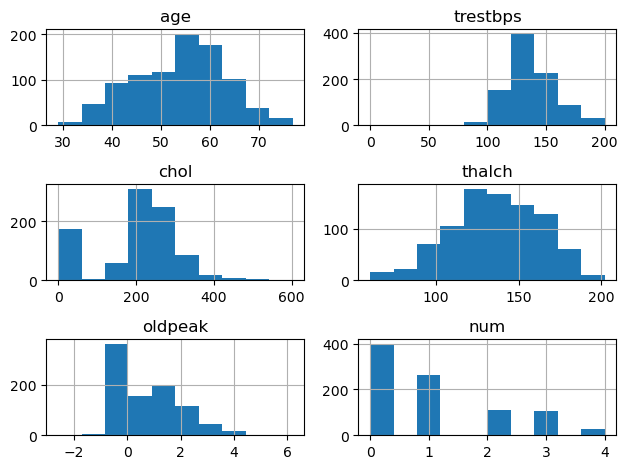

In [9]:
plt.figure(figsize=(12,10))
data.hist(bins=10)
plt.tight_layout()
plt.show()

#### Box plots (outlier detection)

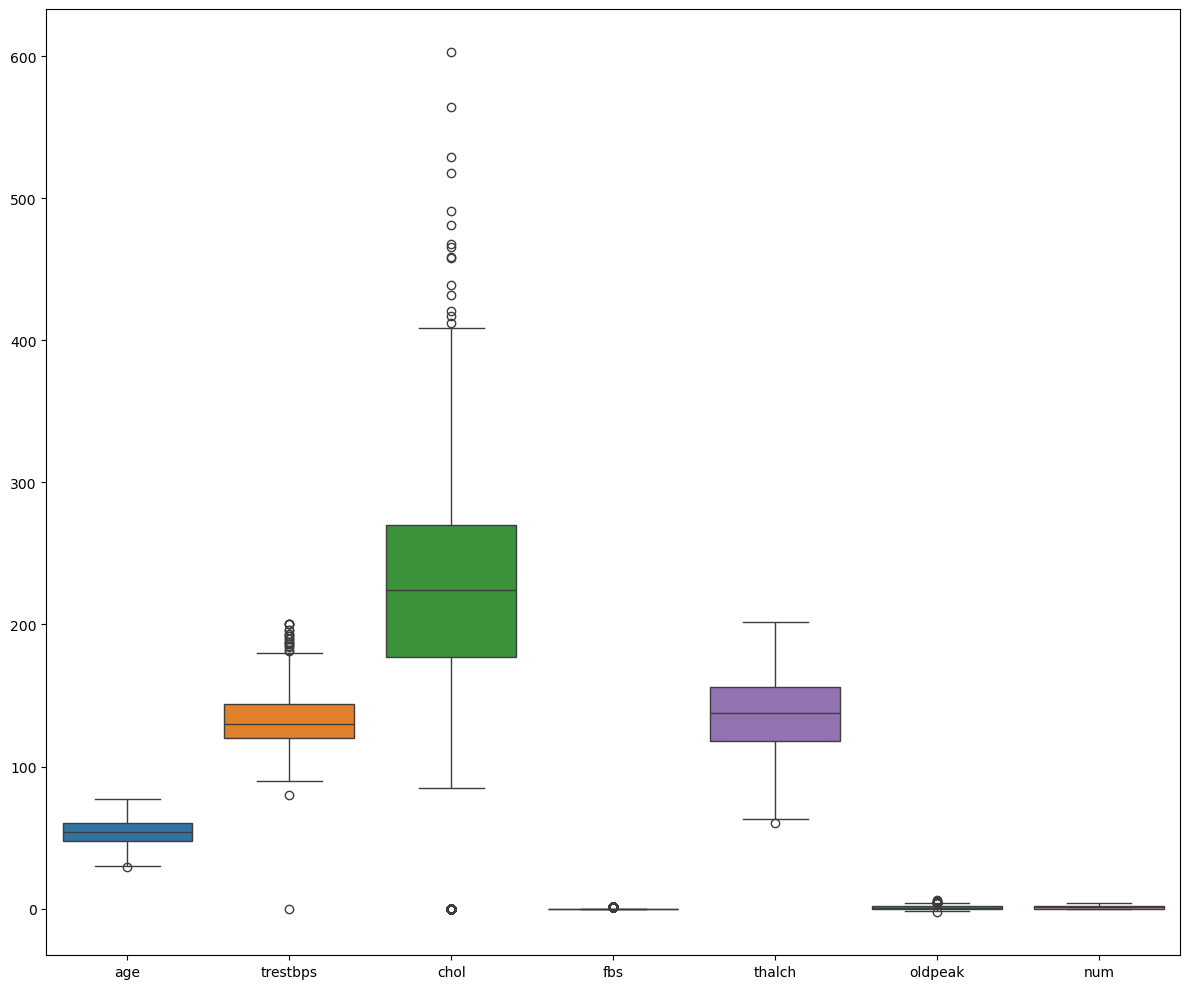

In [11]:
plt.figure(figsize=(12,10))
sns.boxplot(data)
plt.tight_layout()
plt.show()

## Encoding the categorical 

In [12]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [14]:
data['fbs'] = data['fbs'].map({True:1, False:0})
data['exang'] = data['exang'].map({True:1, False:0})

In [15]:
data['exang'].fillna(data['exang'].median(), inplace=True)


In [24]:
data['exang'] = data['exang'].astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 92.3+ KB


#### Encode Categorical Strings

In [28]:
num_data = data.select_dtypes(include='number')
cat_data = data.select_dtypes(include='object')
print(num_data.head())
print(cat_data.head())

   age  trestbps  chol  fbs  thalch  exang  oldpeak  num
0   63       145   233    1     150      0      2.3    0
1   41       135   203    0     132      0      0.0    0
2   57       140   192    0     148      0      0.4    0
3   52       118   186    0     190      0      0.0    0
4   57       110   201    0     126      1      1.5    0
    sex               cp         restecg        slope          thal
0  Male   typical angina  lv hypertrophy  downsloping  fixed defect
1  Male  atypical angina          normal         flat  fixed defect
2  Male     asymptomatic          normal         flat  fixed defect
3  Male   typical angina  lv hypertrophy         flat  fixed defect
4  Male     asymptomatic          normal         flat  fixed defect


In [31]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

OHE_cat = OHE.fit_transform(cat_data)
OHE_cat = pd.DataFrame(OHE_cat, columns=OHE.get_feature_names_out(cat_data.columns))
OHE_cat.head()

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [33]:
fin_data = pd.concat([num_data, OHE_cat], axis=1)
fin_data.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,0,2.3,0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,135,203,0,132,0,0.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,140,192,0,148,0,0.4,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,118,186,0,190,0,0.0,0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,110,201,0,126,1,1.5,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
## for feature , saving this file

data.to_csv('heart_disease_DT_modify_OHE.csv', index=False)

In [38]:
fin_data.describe()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,0.203744,135.957048,0.371145,0.864537,1.008811,0.209251,0.790749,...,0.049559,0.205947,0.596916,0.197137,0.172907,0.498899,0.328194,0.216960,0.373348,0.409692
std,9.158031,20.401608,112.097949,0.403003,26.804929,0.483378,1.060433,1.144436,0.406998,0.406998,...,0.217153,0.404615,0.490788,0.398056,0.378376,0.500274,0.469815,0.412403,0.483960,0.492048
min,29.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,120.000000,176.750000,0.000000,118.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.000000,0.500000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,144.000000,270.000000,0.000000,156.000000,1.000000,1.500000,2.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation matrix

In [39]:
fin_data.corr()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Female,sex_Male,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.143744,0.217942,0.326493,-0.052194,0.052194,...,0.036794,0.143393,-0.226702,0.133759,0.001171,0.073709,-0.079430,0.017225,-0.076478,0.060784
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.093340,0.134945,0.137251,-0.016441,0.016441,...,0.045199,0.026509,-0.118964,0.119733,-0.046933,0.061674,-0.027874,0.017844,-0.098933,0.082352
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,-0.040070,0.032205,-0.238813,0.191513,-0.191513,...,0.013506,0.169316,-0.027488,-0.138215,-0.036498,-0.010115,0.040165,-0.000369,0.050639,-0.049498
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,-0.015066,0.008154,0.156268,-0.092167,0.092167,...,0.023074,0.012845,-0.108306,0.120480,0.007318,0.025723,-0.033284,0.065425,-0.045616,-0.009969
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.285956,-0.112624,-0.323058,0.178794,-0.178794,...,0.080678,0.127481,0.042430,-0.181896,-0.059382,-0.219650,0.281715,-0.063088,0.208529,-0.152225
exang,0.143744,0.093340,-0.040070,-0.015066,-0.285956,1.000000,0.390715,0.344856,-0.154214,0.154214,...,-0.122909,-0.002278,-0.028632,0.037618,-0.019711,0.241055,-0.240809,0.004891,-0.173524,0.166573
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,0.390715,1.000000,0.406078,-0.088802,0.088802,...,0.035889,0.096441,-0.096345,0.020759,0.032610,0.205259,-0.244830,0.050891,-0.140883,0.095914
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.344856,0.406078,1.000000,-0.259605,0.259605,...,-0.054996,0.072269,-0.166409,0.131716,0.027031,0.163703,-0.196087,0.033322,-0.236859,0.205038
sex_Female,-0.052194,-0.016441,0.191513,-0.092167,0.178794,-0.154214,-0.088802,-0.259605,1.000000,-1.000000,...,-0.005193,0.052691,0.014273,-0.071157,-0.027581,-0.020527,0.044070,-0.060580,0.235451,-0.180807
sex_Male,0.052194,0.016441,-0.191513,0.092167,-0.178794,0.154214,0.088802,0.259605,-1.000000,1.000000,...,0.005193,-0.052691,-0.014273,0.071157,0.027581,0.020527,-0.044070,0.060580,-0.235451,0.180807


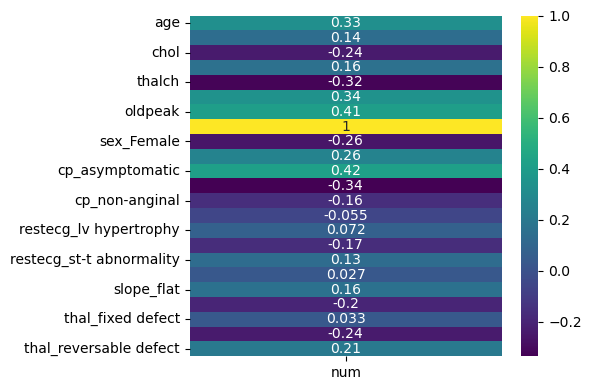

In [40]:
# correlation with target 'num'
plt.figure(figsize=(6,4))
sns.heatmap(fin_data.corr()[['num']], annot=True, cmap='viridis')
plt.tight_layout()
plt.show()

#### Split features & Target

In [41]:
X = fin_data.drop(columns=['num'])
y = fin_data['num']

In [42]:
X.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Female,sex_Male,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,0,2.3,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,135,203,0,132,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57,140,192,0,148,0,0.4,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52,118,186,0,190,0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57,110,201,0,126,1,1.5,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [44]:
y.value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

### Train, Test & Split the Data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 22), (182, 22), (726,), (182,))

# Decision Tree Model fitting

In [46]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

DT = DecisionTreeClassifier(random_state=42, class_weight='balanced')
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

#### Validation on Train Data

In [47]:
y_pred_train = DT.predict(X_train)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
def evaluate_DT(y, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accu = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    print('Accuracy for testing :', np.round(accu, 3))
    print('Precision for testing:', np.round(prec, 3))
    print('Recall for testing   :', np.round(recall, 3))
    print('F1 for testing       :', np.round(f1, 3))

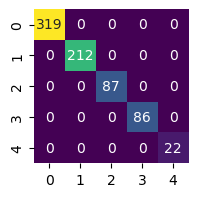

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

Accuracy for testing : 1.0
Precision for testing: 1.0
Recall for testing   : 1.0
F1 for testing       : 1.0


In [50]:
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_train, y_pred_train)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_train, y_pred_train))
evaluate_DT(y_train, y_pred_train)

#### Validation on Testing Data

In [51]:
y_pred_test = DT.predict(X_test)

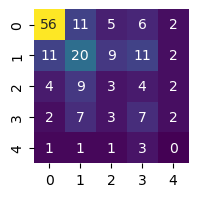

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        80
           1       0.42      0.38      0.40        53
           2       0.14      0.14      0.14        22
           3       0.23      0.33      0.27        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.50      0.47      0.48       182

Accuracy for testing : 0.473
Precision for testing: 0.497
Recall for testing   : 0.473
F1 for testing       : 0.483


In [52]:
plt.figure(figsize=(2,2))
CM = confusion_matrix(y_test, y_pred_test)
sns.heatmap(CM, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.show()
print(classification_report(y_test, y_pred_test))
evaluate_DT(y_test, y_pred_test)

In [53]:
print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_pred_train))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_pred_test))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        80
           1       0.42      0.38      0.40        53
           2       0.14      0.14      0.14        22
           3       0.23      0.33      0.27        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.31      0.31      0.31  

In [54]:
# Cross Validation
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.2, random_state=42)

cv_results = cross_validate(DT, X, y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: test accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))


cross validation: test accuracy: 1.0
cross validation: test accuracy: 0.47


#### As per the results, the model is BAD
- Poor test accuracy
- Very low macro F1-score
- Model ignores minority classes [Class 4: Precision = 0, Recall = 0]
- Overfitting + underfitting together
-

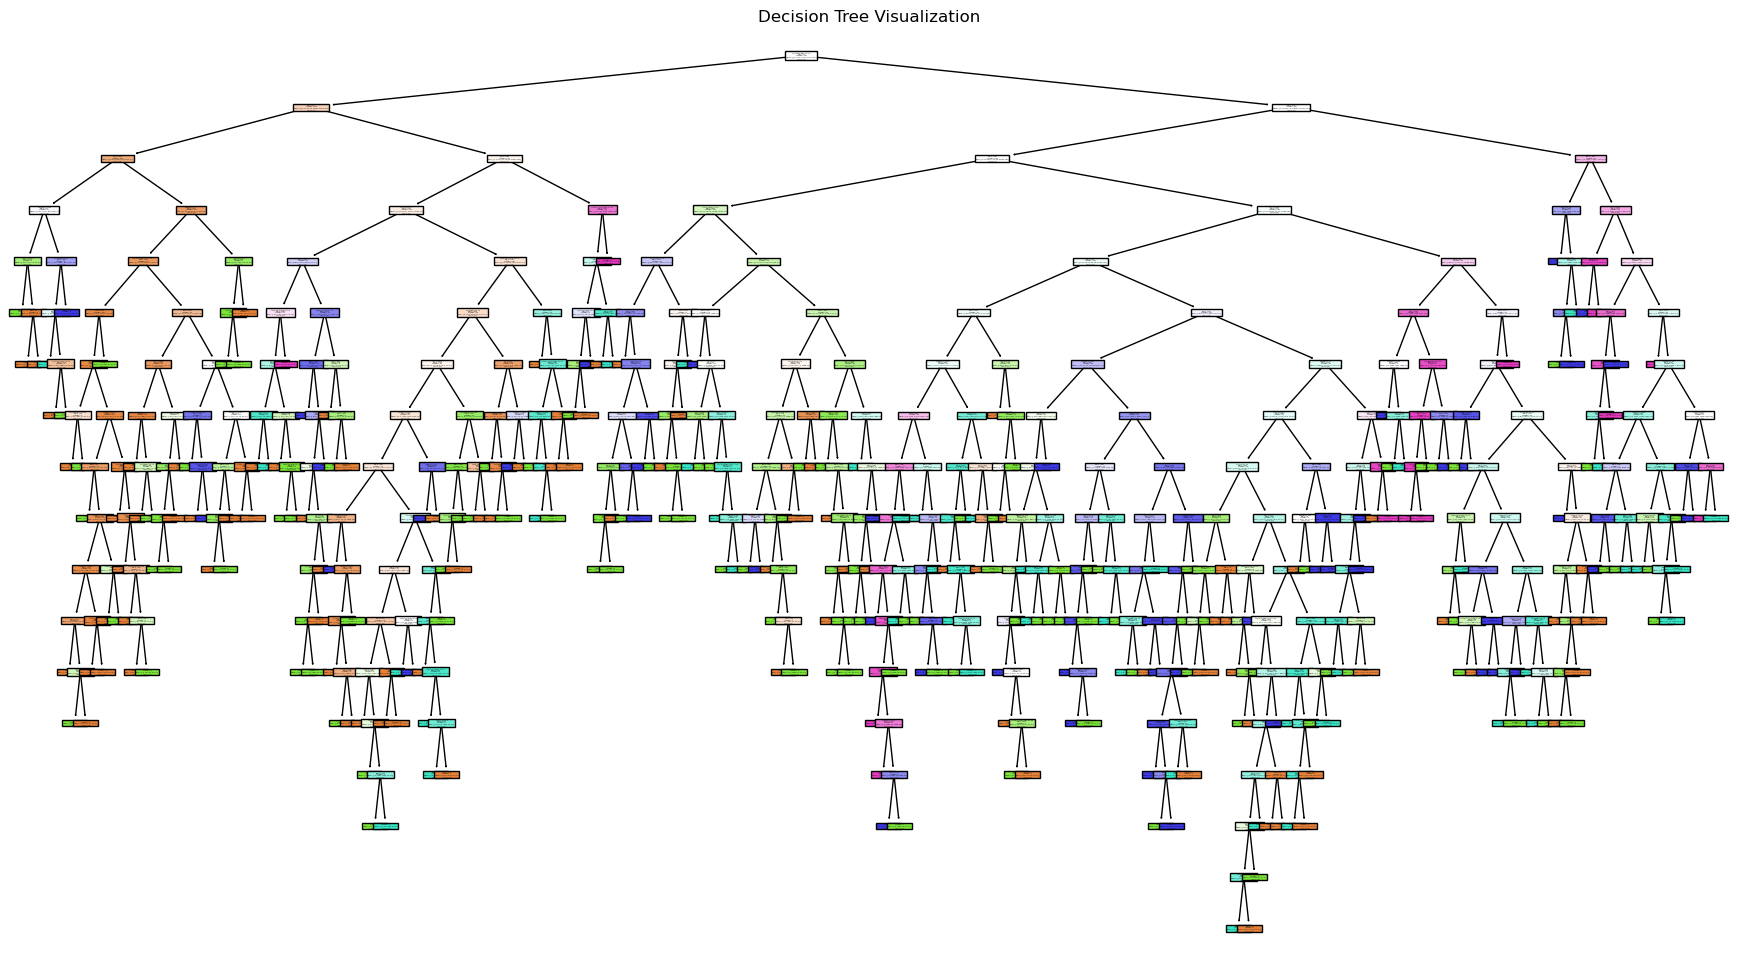

In [55]:
plt.figure(figsize=(22,12))
plot_tree(
    DT,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


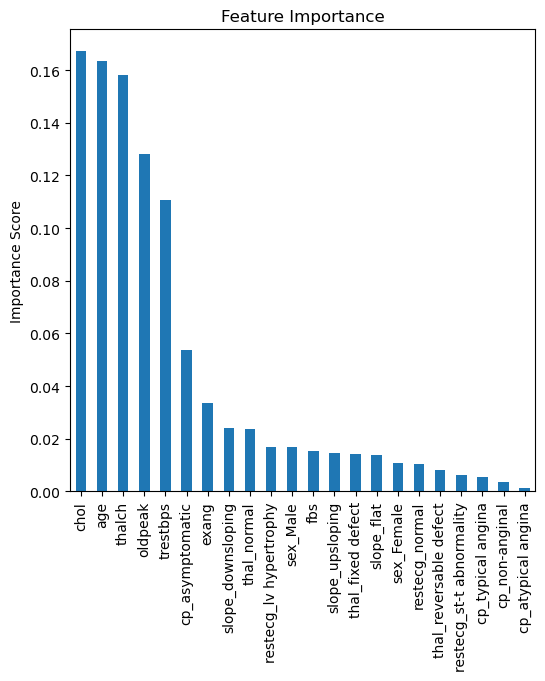

In [56]:
importance = pd.Series(
    DT.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(6,6))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


In [57]:
# with gini

DT_gini = DecisionTreeClassifier(criterion='gini',
                            splitter='best',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1)
DT_gini.fit(X_train, y_train)

y_train_pred_gini = DT_gini.predict(X_train)
y_test_pred_gini = DT_gini.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_train_pred_gini))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred_gini))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        80
           1       0.44      0.45      0.45        53
           2       0.20      0.18      0.19        22
           3       0.21      0.33      0.25        21
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.32      0.32      0.32  

In [58]:
# with entropy

DT_entropy = DecisionTreeClassifier(criterion='entropy',
                                    splitter='best',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1)
DT_entropy.fit(X_train, y_train)

y_train_pred_entropy = DT_entropy.predict(X_train)
y_test_pred_entropy = DT_entropy.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_train_pred_entropy))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred_entropy))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        22

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        80
           1       0.36      0.45      0.40        53
           2       0.17      0.09      0.12        22
           3       0.12      0.14      0.13        21
           4       0.00      0.00      0.00         6

    accuracy                           0.44       182
   macro avg       0.27      0.26      0.27  

### Hyperparameter Tuning (GridSearchCV)

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'criterion': ['gini','entropy'],
             'max_depth': [1,2,3,4,5],
             'min_samples_split':[1,3,5,7],
             'min_samples_leaf': [1,3,5,7,10,12]}



grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                   param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 12],
                         'min_samples_split': [1, 3, 5, 7]},
             scoring='accuracy')

In [61]:
best_DT = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [62]:
y_train_pred_GS = best_DT.predict(X_train)
y_test_pred_GS = best_DT.predict(X_test)

print("TRAIN PERFORMANCE")
print(classification_report(y_train, y_train_pred_GS))
print('*'*50)
print("TEST PERFORMANCE")
print(classification_report(y_test, y_test_pred_GS))

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       319
           1       0.48      0.72      0.58       212
           2       0.43      0.24      0.31        87
           3       0.50      0.07      0.12        86
           4       0.00      0.00      0.00        22

    accuracy                           0.62       726
   macro avg       0.44      0.38      0.36       726
weighted avg       0.59      0.62      0.58       726

**************************************************
TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        80
           1       0.46      0.75      0.57        53
           2       0.17      0.09      0.12        22
           3       1.00      0.05      0.09        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.48      0.34      0.31  

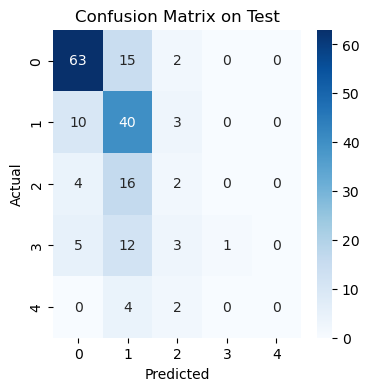

In [63]:
cm = confusion_matrix(y_test, y_test_pred_GS)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test")
plt.show()

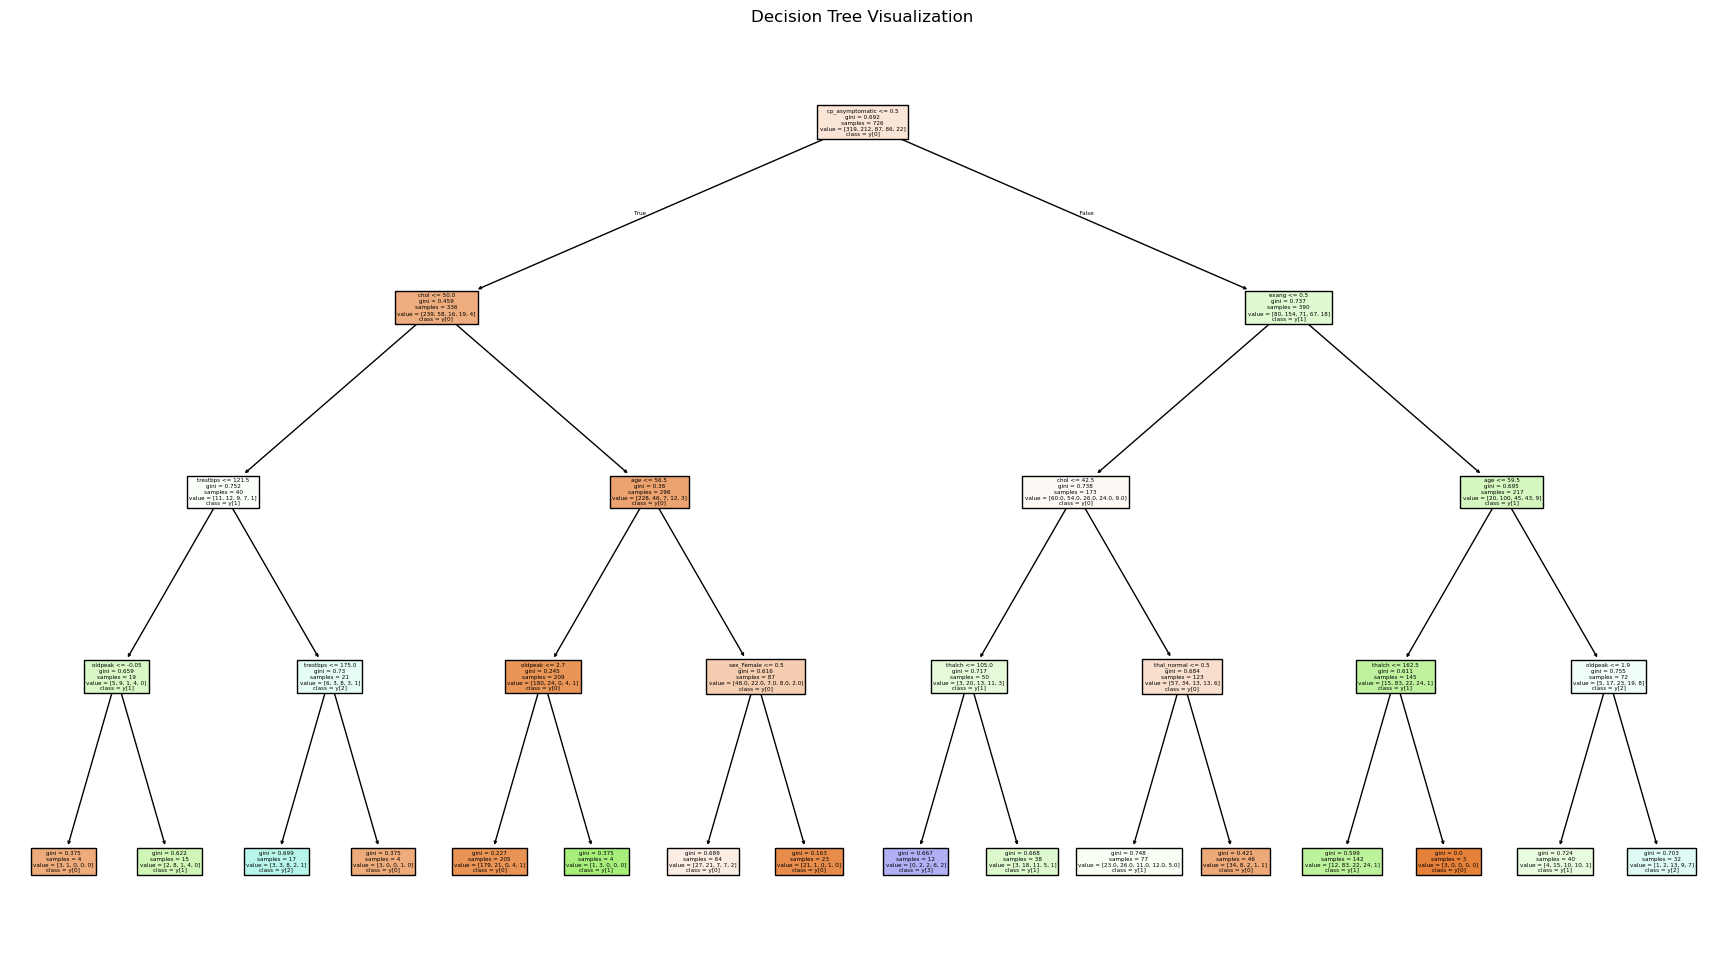

In [64]:
plt.figure(figsize=(22,12))
plot_tree(
    best_DT,
    feature_names=X.columns,
    class_names=True,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


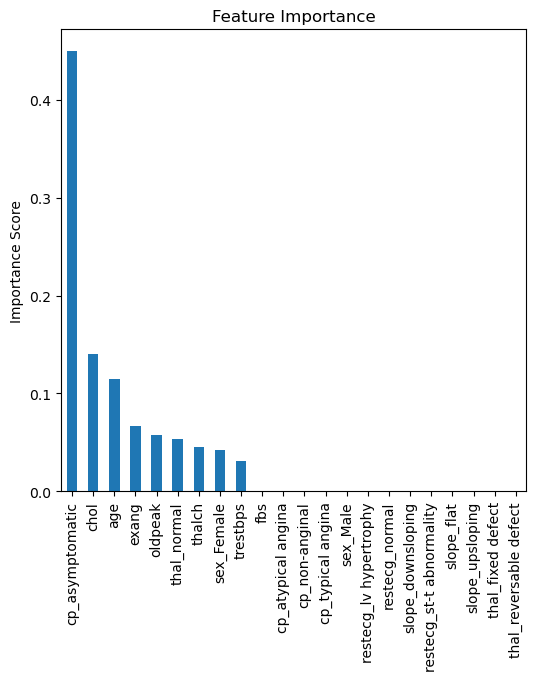

In [65]:
importance = pd.Series(
    best_DT.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(6,6))
importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


## Conclusion :

- Encoded both Label encoding & OneHot Encoding
- Observed same,model underfitted
- becz Train & test score both are Low

- The Model is Not GOOD
- Observed model performed well on training data but poorly on unseen data, which is a clear sign of overfitting.
- Observed Decision Tree model performed poorly due to overfitting and high variance.
- Cross-validation revealed that the model did not generalize well to unseen data.
- Decision Trees are interpretable but high-variance models
- Model is not achieving high predictive performance 